# SVM

### Zad

In [70]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

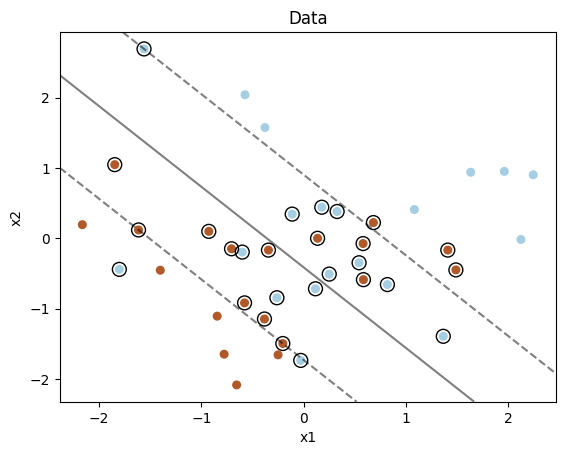

In [71]:
n_cls = 20   # Number of samples in each class.
 
np.random.seed(1)  # for reproducibility
x11 = np.random.normal(0.5, 1, (n_cls, 1))
np.random.seed(2)  # for reproducibility
x12 = np.random.normal(0.4, 1, (n_cls, 1))
np.random.seed(3)  # for reproducibility
x21 = np.random.normal(-0.3, 1, (n_cls, 1))
np.random.seed(4)  # for reproducibility
x22 = np.random.normal(-0.5, 1, (n_cls, 1))
 
X = np.vstack((
    np.hstack((x11, x12)),
    np.hstack((x21, x22))
))
 
y = np.hstack((-1 * np.ones(n_cls), +1 * np.ones(n_cls)))

clf = svm.SVC(kernel='linear', C=1000, random_state=1, probability=True)
clf.fit(X, y)

fig = plt.figure(1)
plt.clf()
 
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
 
# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
 
# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)
 
# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Data')
plt.show()

posterior probabilities: 
 [[0.62901122 0.37098878]
 [0.26314804 0.73685196]]


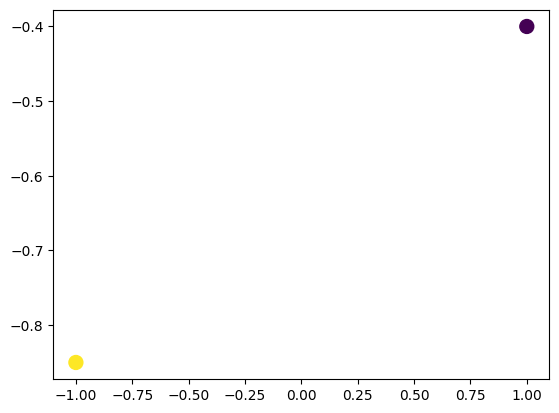

In [72]:
X_new = np.array([
    [1, -0.4],
    [-1, -0.85],
    ])
 
y_new = clf.predict(X_new)
 
plt.scatter(X_new[:, 0], X_new[:, 1], c=y_new, s=100)
fig.canvas.draw()
fig.canvas.flush_events()

# Get posterior probabilities for predictions (requires SVC to be created with
#   `probability=True`).
post_probs = clf.predict_proba(X_new)
print("posterior probabilities: \n", post_probs)

### Zad 1

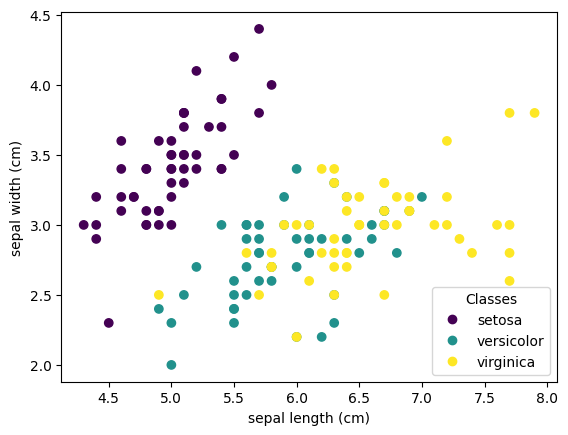

In [73]:
iris = datasets.load_iris()

_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

In [74]:
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target

iris_df['species'] = iris_df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

pivoted_iris = pd.get_dummies(iris_df, columns=['species'], prefix='', prefix_sep='', dtype=int)

print(pivoted_iris.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   setosa  versicolor  virginica  
0       1           0          0  
1       1           0          0  
2       1           0          0  
3       1           0          0  
4       1           0          0  


In [75]:
X_train, X_test, y_train, y_test = train_test_split(np.array(pivoted_iris)[:, :4], np.array(pivoted_iris)[:, 4:])

[1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0.
 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1.
 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.]


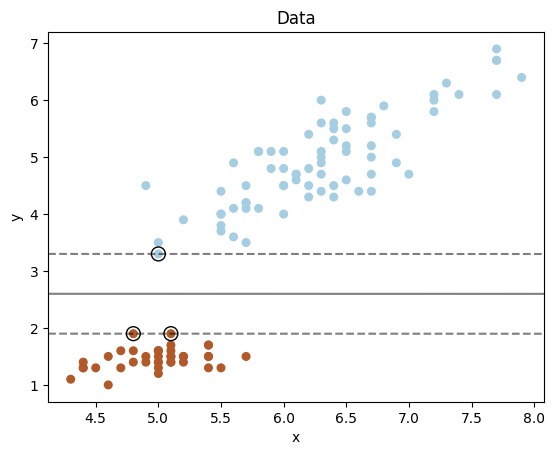

In [79]:

def svm_all(X_train, y_train, X_test, y_test, label, axlabels):
    print(y_train)
    clf = svm.SVC(kernel='linear', C=1000, random_state=1, probability=True)
    clf.fit(X_train, y_train)

    fig = plt.figure(1)
    plt.clf()
    
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=30, cmap=plt.cm.Paired)
    
    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)
    
    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
            linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
            linewidth=1, facecolors='none', edgecolors='k')
    
    plt.xlabel(axlabels[0])
    plt.ylabel(axlabels[1])
    plt.title('Data')
    plt.show()

svm_all(X_train[:, [0, 2]], y_train[:, 0], X_test, y_test, "a", ["x", "y"])